In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import array
from numpy.random import choice, permutation



In [0]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [0]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def boostrap_mean(sample, sample_size, n_iterations):
	samples_arr = array(choice(sample, (n_iterations, sample_size)))
	n_it_means = []
	data_mean = np.mean(samples_arr)
	for i in range(0, n_iterations):
		n_it_means.append(np.mean(samples_arr[i,:]))
	
	lower = np.percentile(n_it_means, 2.5)
	upper = np.percentile(n_it_means, 97.5)
	return data_mean, lower, upper


(0, 100000)

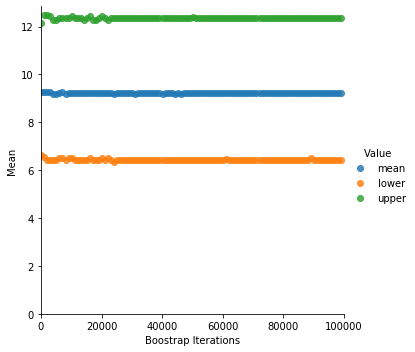

In [4]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')




Now, modify the bootstrap function so that you can pass your desired confidence interval as a parameter.



In [0]:
def boostrap_mean_ci(sample, sample_size, n_iterations, ci):
	l_lim = (100 - ci) / 2.0
	u_lim = l_lim + ci
	samples_arr = array(choice(sample, (n_iterations, sample_size)))
	n_it_means = []
	data_mean = np.mean(samples_arr)
	for i in range(0, n_iterations):
		n_it_means.append(np.mean(samples_arr[i,:]))
	
	lower = np.percentile(n_it_means, l_lim)
	upper = np.percentile(n_it_means, u_lim)
	return data_mean, lower, upper

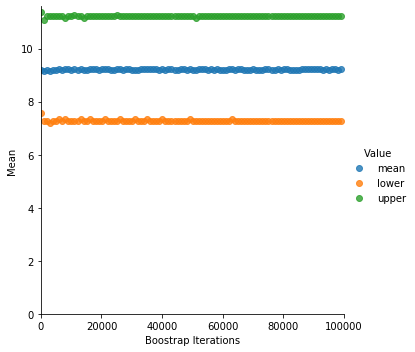

In [6]:

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset. Load the vehicles.csv file and check the Moodle page for instructions on how to proceed


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: FutureWarning: Series.data is deprecated and will be removed in a future version
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: FutureWarning: Series.data is deprecated and will be removed in a future version


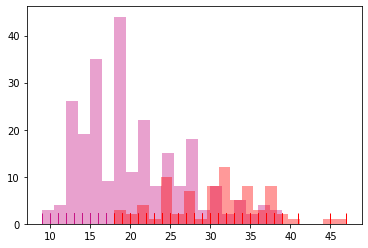

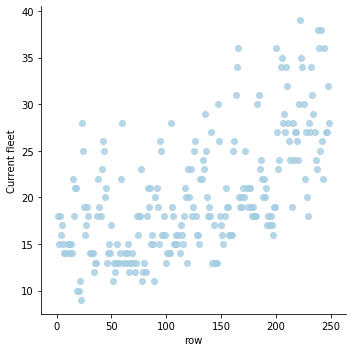

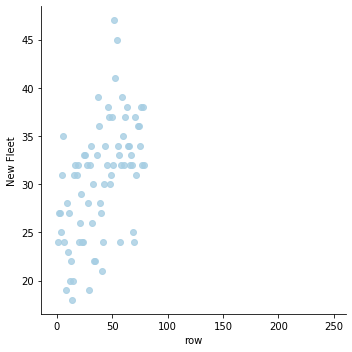

In [49]:
# Load and visualise the vehicles dataset
# <---INSERT YOUR CODE HERE--->
# Note: you can add more cells as needed to organise your code and your plots
sns.set_palette("Paired")

df_vech = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
data_vech_cur_fleet = df_vech.values.T[0]
data_vech_new_fleet = [d for d in df_vech.values.T[1] if not np.isnan(d)]

# boots = []
# for i in range(100, 100000, 1000):
#     boot = boostrap_mean(data_vech_cur_fleet, data_vech_cur_fleet.shape[0], i)
#     boots.append([i, boot[0], "mean"])
#     boots.append([i, boot[1], "lower"])
#     boots.append([i, boot[2], "upper"])

# df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
# sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

# sns_plot.axes[0, 0].set_ylim(0,)
# sns_plot.axes[0, 0].set_xlim(0, 100000)
sns.distplot(data_vech_cur_fleet, bins=20, kde=False, rug=True, color='mediumvioletred')
sns.distplot(data_vech_new_fleet, bins=20, kde=False, rug=True, color='r')


df_current_list = list(zip(range(1, len(df_vech['Current fleet'].data)), list(df_vech['Current fleet'].data)))
df_curr = pd.DataFrame(df_current_list, columns = ['row', 'Current fleet'])
sns.lmplot(df_curr.columns[0], df_curr.columns[1], data=df_curr, fit_reg=False)

df_new_list = list(zip(range(1, len(df_vech['New Fleet'].data)), list(df_vech['New Fleet'].data)))
df_new = pd.DataFrame(df_new_list, columns = ['row', 'New Fleet'])
sns.lmplot(df_new.columns[0], df_new.columns[1], data=df_new, fit_reg=False)

In [0]:
# Compare the two fleets.
# You can create a permutation test function to do this. Check the lecture notes!

In [58]:
curr_mean = np.mean(data_vech_cur_fleet)
new_mean = np.mean([d for d in data_vech_new_fleet if not np.isnan(d)])
print(f'Mean of Current Fleet: {curr_mean}')
print(f'Mean of New Fleet: {new_mean}')

boots_curr = []
for i in range(100, 1000, 1000):
    boot = boostrap_mean(data_vech_cur_fleet, data_vech_cur_fleet.shape[0], i)
    boots_curr.append([i, boot[0], "mean"])
    boots_curr.append([i, boot[1], "lower"])
    boots_curr.append([i, boot[2], "upper"])
upper_bounds_curr = [b[1] for b in boots_curr if b[-1] is 'upper']
means_curr = [b[1] for b in boots_curr if b[-1] is 'mean']
lower_bounds_curr = [b[1] for b in boots_curr if b[-1] is 'lower']
curr_mean = np.mean(array(means_curr))
print(f'Current Fleet Mean (upper bound): {np.mean(array(upper_bounds_curr))}')
print(f'Current Fleet Mean : {np.mean(array(means_curr))}')
print(f'Current Fleet Mean (lower bound): {np.mean(array(lower_bounds_curr))}')



boots_new = []
for i in range(100, 100, 1000):
    boot = boostrap_mean(data_vech_new_fleet, data_vech_new_fleet.shape[0], i)
    boots_new.append([i, boot[0], "mean"])
    boots_new.append([i, boot[1], "lower"])
    boots_new.append([i, boot[2], "upper"])
upper_bounds_new = [b[1] for b in boots_new if b[-1] is 'upper']
means_new = [b[1] for b in boots_new if b[-1] is 'mean']
lower_bounds_new = [b[1] for b in boots_new if b[-1] is 'lower']
new_mean = np.mean(array(means_new))
print(f'New Fleet Mean (upper bound): {np.mean(array(upper_bounds_new))}')
print(f'New Fleet Mean : {new_mean}')
print(f'New Fleet Mean (lower bound): {np.mean(array(lower_bounds_new))}')

t_obs = curr_mean - new_mean
def perm_test(arr_a, arr_b, obs_val, perms=10000):
    for _ in range(perms): 
        res_arr_a = []
        res_arr_b = []  
        concat = np.concatenate((arr_a, arr_b))
        perm = permutation(concat)
        arr_a = perm[:int(len(perm)/2)]
        arr_b = perm[int(len(perm)/2):]
        res_arr_a.append(boostrap_mean(arr_a, len(arr_a), perms)[0])
        res_arr_b.append(boostrap_mean(arr_b, len(arr_b), perms)[0])
    results = [b - a for (a,b) in zip(res_arr_a, res_arr_b)]
    p_val = len(list(filter(lambda z: z > obs_val, results))) / len(list(filter(lambda z: not z > obs_val, results)))
    return p_val

print(perm_test(data_vech_cur_fleet, data_vech_new_fleet, t_obs))

Mean of Current Fleet: 20.14457831325301
Mean of New Fleet: 30.481012658227847
boots_curr
[[100, 20.15020080321285, 'mean'], [100, 19.224397590361445, 'lower'], [100, 20.940763052208833, 'upper']]
Current Fleet Mean (upper bound): 20.940763052208833
Current Fleet Mean : 20.15020080321285
Current Fleet Mean (lower bound): 19.224397590361445
data_vech_new_fleet
[24. 27. 27. 25. 31. 35. 24. 19. 28. 23. 27. 20. 22. 18. 20. 31. 32. 31.
 32. 24. 26. 29. 24. 24. 33. 33. 32. 28. 19. 32. 34. 26. 30. 22. 22. 33.
 39. 36. 28. 27. 21. 24. 30. 34. 32. 38. 37. 30. 31. 37. 32. 47. 41. 45.
 34. 33. 24. 32. 39. 35. 32. 37. 38. 34. 34. 32. 33. 32. 25. 24. 37. 31.
 36. 36. 34. 38. 32. 38. 32.]
data_vech_new_fleet
[24. 27. 27. 25. 31. 35. 24. 19. 28. 23. 27. 20. 22. 18. 20. 31. 32. 31.
 32. 24. 26. 29. 24. 24. 33. 33. 32. 28. 19. 32. 34. 26. 30. 22. 22. 33.
 39. 36. 28. 27. 21. 24. 30. 34. 32. 38. 37. 30. 31. 37. 32. 47. 41. 45.
 34. 33. 24. 32. 39. 35. 32. 37. 38. 34. 34. 32. 33. 32. 25. 24. 37. 31.
 36.

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


KeyboardInterrupt: ignored